In [ ]:
#Importing

import torch
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.datasets import ImageFolder

import os
import shutil
import random

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
use_cuda = True

# Checking Image Sizes

In [ ]:
# Checking image sizes in BIRAD3_Prelim folder:

from PIL import Image

# Open an image

BIRAD3_Prelim = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source/BIRAD3_Prelim'

BIRAD3_Pics = os.listdir(BIRAD3_Prelim)

for file in BIRAD3_Pics:
    # Construct the full path to the image file
    file_path = os.path.join(BIRAD3_Prelim, file)

    # Open the image using the full file path
    image = Image.open(file_path)

    # Get width and height
    width, height = image.size

    print(width, height)

1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578


Looking at the preliminary set of images from BIRADS 3, we see that they only have important information in the center of the image. As such, we center crop the image to have size of 578x578.

In [ ]:
# Resizing images from BIRADS 3 and saving them to new folder:

BIRAD3_Prelim = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source/BIRAD3_Prelim'
BIRAD3_Prelim_Resized = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source/BIRAD3_Prelim_Resized'

BIRAD3_Pics = os.listdir(BIRAD3_Prelim)

for file in BIRAD3_Pics:
    # We first make the original image path and the resized image path:
    input_image_path = os.path.join(BIRAD3_Prelim, file)
    output_image_path = os.path.join(BIRAD3_Prelim_Resized, file)

    # Open the input image
    input_image = Image.open(input_image_path)

    # Resize the image to the desired size
    output_image = input_image.(desired_size, Image.ANTIALIAS)

    # Save the resized image to the output folder
    output_image.save(output_image_path)

In [ ]:
# Checking image sizes in BIRAD4_Prelim folder:

from PIL import Image

# Open an image

BIRAD4_Prelim = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source/BIRAD4_Prelim'

BIRAD4_Pics = os.listdir(BIRAD4_Prelim)

for file in BIRAD4_Pics:
    # Construct the full path to the image file
    file_path = os.path.join(BIRAD4_Prelim, file)

    # Open the image using the full file path
    image = Image.open(file_path)

    # Get width and height
    width, height = image.size

    print(width, height)

1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1282 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1282 578
1267 578
1282 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1267 578
1282 578
1267 578
1267 578


In [ ]:
# Checking image sizes in BIRAD1_Prelim folder:

from PIL import Image

# Open an image

BIRAD1_Prelim = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source/BIRAD1_Prelim'

BIRAD1_Pics = os.listdir(BIRAD1_Prelim)

for file in BIRAD1_Pics:
    # Construct the full path to the image file
    file_path = os.path.join(BIRAD1_Prelim, file)

    # Open the image using the full file path
    image = Image.open(file_path)

    # Get width and height
    width, height = image.size

    print(width, height)

2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
824 578
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
824 578
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
824 578
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
824 578
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584
2816 3584


# Architecture & Data Loading

In [ ]:
# Baseline Model Architecture

class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5, 1, 2) # Starting with 3 channels (RGB), output of first conv layer has 8 channels, kernel size of 5 (more general features), padding of 2 (same padding)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 12, 3, 1, 2) # 8 input channels, 12 output channels, kernel size of 3 (finer details), padding of 2 (same padding)
        self.fc1 = nn.Linear(12 * 145 * 145, 32) ####
        self.fc2 = nn.Linear(32, 3) # There should be 5 classes (BIRADS 1, 2, 3, 4, 5), but we have completed data processing for 3 of them

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 12 * 145 * 145)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x


In [ ]:
# Need to split the BIRAD_Prelim datasets (i.e. the small datasets used for preliminary results) into training/validation...

# Here we make the training folder... We will use 70% of the small dataset for training and 30% for validation.

source_folder = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source'
train_folder = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Train'

subfolders = os.listdir(source_folder)

# Making the class subfolders in the training folder, and then moving 70% of the images within each class to their respective folders:
for BIRAD in subfolders:
  os.makedirs(train_folder + '/' + BIRAD, exist_ok = True)
  files = os.listdir(source_folder + '/' + BIRAD)

  for image in files:
    source_path = source_folder + '/' + BIRAD + '/' + image
    destination_path = train_folder + '/' + BIRAD + '/' + image
    shutil.move(source_path, destination_path)

    if len(os.listdir(train_folder + '/' + BIRAD)) >= 0.7*len(files): #This is the part that ensures 70% for training
      break


In [ ]:
source_folder = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Source'
val_folder = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Val'

subfolders = os.listdir(source_folder)

# Making the class subfolders in the validation folder, and then moving rest of images from the source folder (30%):
for BIRAD in subfolders:
  os.makedirs(val_folder + '/' + BIRAD, exist_ok = True)
  files = os.listdir(source_folder + '/' + BIRAD)

  for image in files:
    source_path = source_folder + '/' + BIRAD + '/' + image
    destination_path = val_folder + '/' + BIRAD + '/' + image
    shutil.move(source_path, destination_path)

In [ ]:
# Defining Paths for Small Dataset Testing

train_folder_prelim = '/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Train'
val_folder_prelim ='/content/drive/MyDrive/APS360_Fall/Project/BIRADS_Prelim_Val'

transform = transforms.Compose([transforms.Resize((578,578)),
                                transforms.ToTensor()])

train_set_prelim = torchvision.datasets.ImageFolder(train_folder_prelim, transform = transform)
val_set_prelim = torchvision.datasets.ImageFolder(val_folder_prelim, transform = transform)


# Metric Code and Training Code

In [ ]:
def get_accuracy(model, data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:

        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)

        #select index with maximum prediction score (This is for multi-class)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]

    return correct / total

In [ ]:
# Training Code

def train(model, train_set, val_set, batch_size=64, num_epochs=32, lr=0.001):
    torch.manual_seed(10)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        n += 1

    epochs = np.arange(1, num_epochs + 1)

    return train_acc, val_acc, epochs

# Training/Evaluation

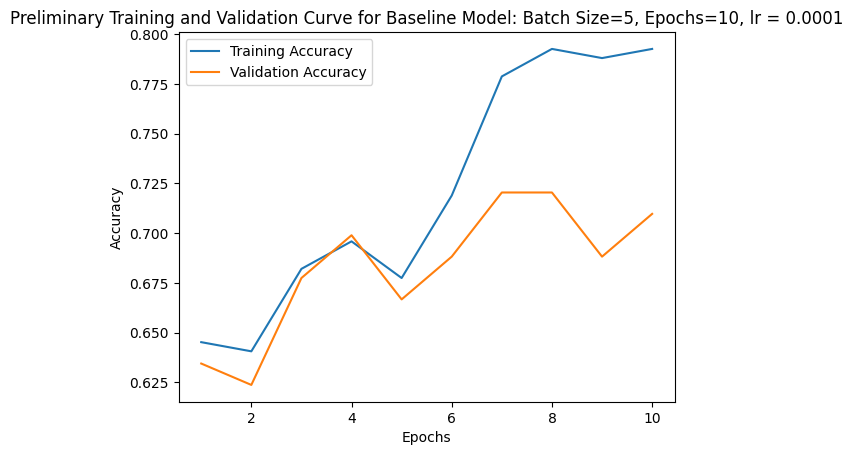

In [ ]:
Baseline = BaselineModel() ##### This is with three classes
if use_cuda and torch.cuda.is_available():
  Baseline.cuda()

train_acc, val_acc, epochs = train(Baseline, train_set_prelim, val_set_prelim, batch_size = 5, num_epochs = 10, lr = 0.0001)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Preliminary Training and Validation Curve for Baseline Model: Batch Size=5, Epochs=10, lr = 0.0001")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Overfit Testing

In [ ]:
# Here we are doing a sanity check to see if our baseline model has the capacity to memorize:

def overfit(model, overfit_loader, batch_size=12, num_epochs=50, lr = 0.001):

    torch.manual_seed(10)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)

    overfit_acc = []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(overfit_loader):

            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
        n += 1

        # track accuracy
        overfit_acc.append(get_accuracy(model, overfit_loader))

    epochs = np.arange(1, num_epochs + 1)

    return epochs, overfit_acc

In [ ]:
overfit_folder = '/content/drive/MyDrive/APS360_Fall/Project/Overfit'

overfit_set = torchvision.datasets.ImageFolder(overfit_folder, transform = transform)

Training Started...


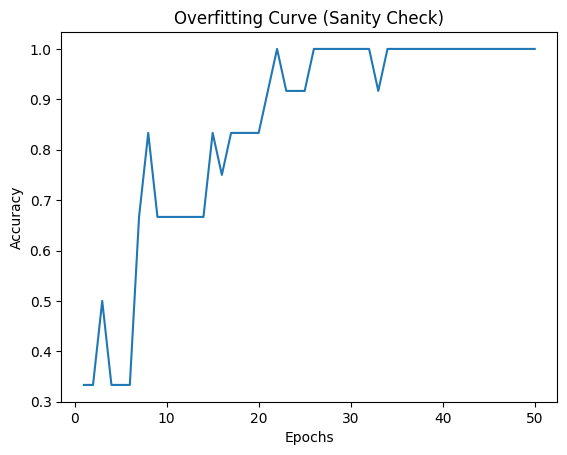

In [ ]:
Baseline = BaselineModel()
if use_cuda and torch.cuda.is_available():
  Baseline.cuda()

overfit_loader = torch.utils.data.DataLoader(overfit_set, batch_size=12, shuffle = True)

epochs, overfit_acc = overfit(Baseline, overfit_loader)

plt.plot(epochs, overfit_acc)

plt.title("Overfitting Curve (Sanity Check)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()